#  VTI Return Forecasting Using Fama French Model Factors.

# Question 1 
You are part of a research team of a FinTech company dedicated to forecast the price direction of public US companies. Using the dataset at VTIreturns.csv, you must build a forecasting model of the VTI (market index)'s next day's return (ret) and its direction using the years 2015-2019 to train and 2020-2021 to test your model. 

The file VTIreturns.csv includes the following variables:

ret: Vanguard Total Stock Market ETF daily return based on adjusted daily closing prices.

Lag1-Lag5: LagX is X-lagged value of ret

5 factors of the Fama French model:

RM-Rf : market return minus risk free rate (market risk premium)

SMB: Small Minus Big (firm size): difference of average return on 9 small and 9 big stock portfolios

HML: High Minus Low (value): difference of average return on 2 value and 2 growth portfolios 

RMW (Robust Minus Weak):  difference of average return on 2 robust and 2 weak operating profitability portfolios 

CMA (Conservative Minus Aggressive):  difference of average return on 2 conservative and 2 aggressive investment portfolios

For this exercise you do not need to know the details of the Fama French model. However, further details and data can be obtained at:
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html




## 1.  Read this csv file. Sort the variables by date in a new dataset. List the names of the variables in the dataset.


In [47]:
import pandas as pd
data = pd.read_csv('VTIreturns.csv')
display(data.head())

data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values(by="Date")

for col in data.columns:
    print(col)

,Date,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5
0,8/17/2015,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611
1,8/18/2015,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078
2,8/19/2015,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001
3,8/20/2015,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131
4,8/21/2015,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802


Date
ret
RM-Rf
SMB
HML
RMW
CMA
Lag1
Lag2
Lag3
Lag4
Lag5


## 2. Generate a new variable ret1 which is the return of the next day and ret_sq which is squared of ret. 



In [48]:
data["ret1"] = data["ret"].shift(-1)

data["ret_sq"] = data["ret"]**2
display(data.head())

,Date,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,ret_sq
0,2015-08-17,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611,-0.257553,0.404392
1,2015-08-18,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078,-0.897452,0.066334
2,2015-08-19,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001,-2.198697,0.805420
3,2015-08-20,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131,-2.920836,4.834270
4,2015-08-21,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802,-4.103392,8.531286


## 3. What is the mean and standard deviation of each variable? Create a simple table of the means and standard deviations.



In [49]:
out = data.agg(['mean','std'])
out

,Date,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,ret_sq
mean,2018-09-06 05:39:38.947368448,0.054173,0.056615,0.000884,-0.017186,0.009461,-0.004418,0.055126,0.054993,0.056435,0.055988,0.056716,0.053794,1.389276
std,646 days 13:26:04.246664456,1.177813,1.189073,0.695138,0.907731,0.455677,0.394264,1.177481,1.177492,1.176188,1.176423,1.176808,1.178102,6.388202


## 4. Explore the distribution of the main variables of this dataset and the relationship with the variable return using graphs and/or statistical values. Discuss your results



Text(0.5, 1.0, 'Histogram ret')

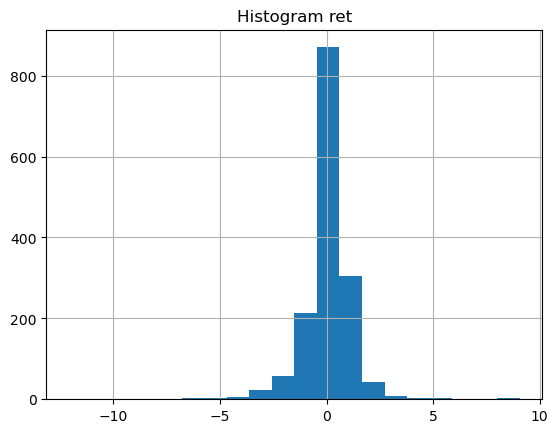

In [50]:
import matplotlib.pyplot as plt
data.describe()
hist = data["ret"].hist(bins = 20)
hist.set_title("Histogram ret")

Text(0.5, 1.0, 'Histogram SMB')

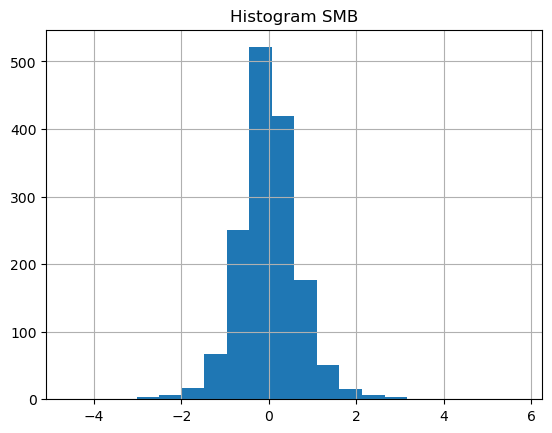

In [51]:
hist = data["SMB"].hist(bins = 20)
hist.set_title("Histogram SMB")

Text(0.5, 1.0, 'Histogram RMW')

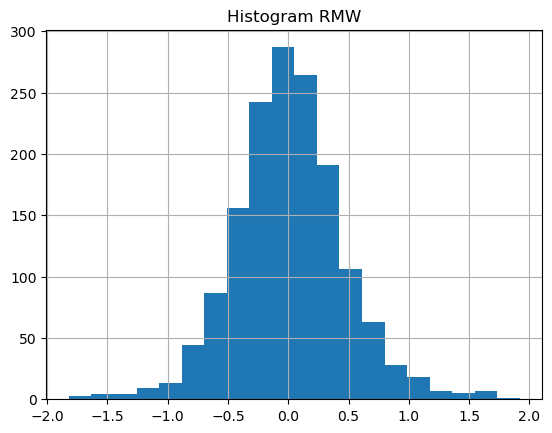

In [52]:
hist = data["RMW"].hist(bins = 20)
hist.set_title("Histogram RMW")

Text(0.5, 1.0, 'Histogram Lag2')

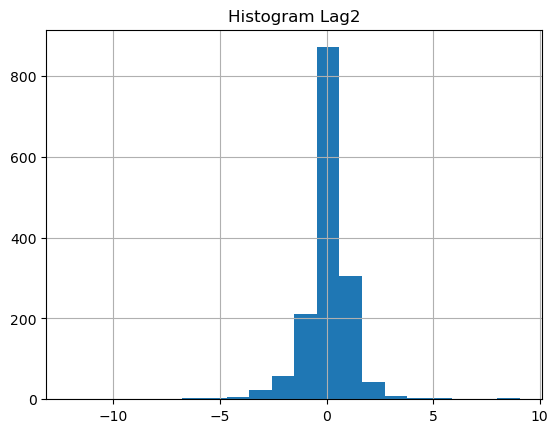

In [53]:
hist = data["Lag2"].hist(bins = 20)
hist.set_title("Histogram Lag2")

Text(0, 0.5, 'HML')

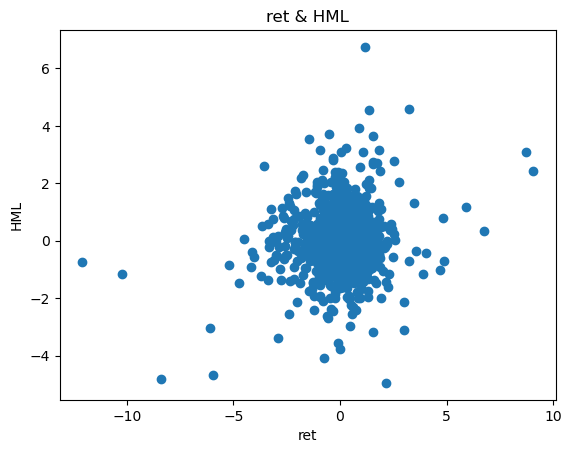

In [54]:
import matplotlib.pyplot as plt
plt.scatter(data["ret"], data["HML"])
plt.title('ret & HML')
plt.xlabel('ret')
plt.ylabel('HML')

Text(0, 0.5, 'CMA')

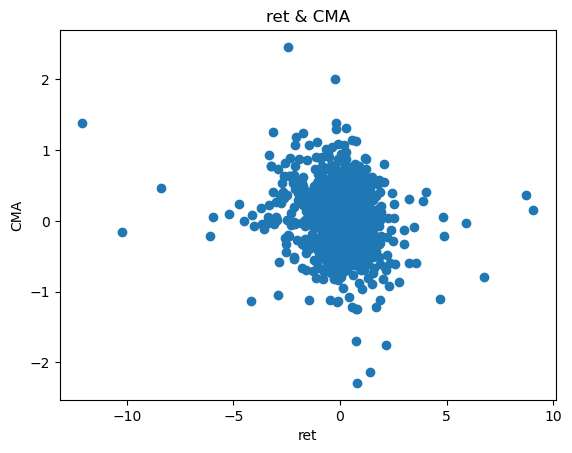

In [55]:
import matplotlib.pyplot as plt
plt.scatter(data["ret"], data["CMA"])
plt.title('ret & CMA')
plt.xlabel('ret')
plt.ylabel('CMA')

Text(0, 0.5, 'Lag1')

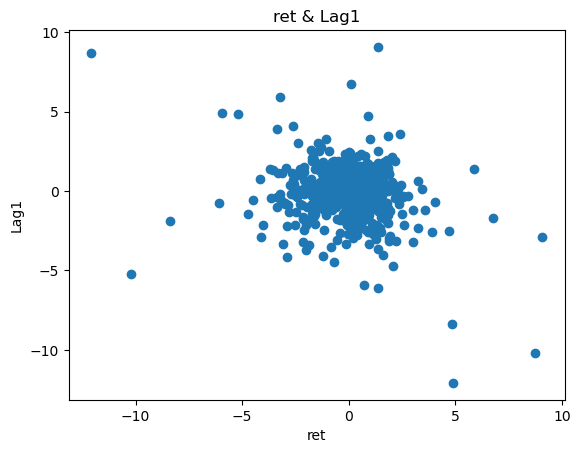

In [56]:
import matplotlib.pyplot as plt
plt.scatter(data["ret"], data["Lag1"])
plt.title('ret & Lag1')
plt.xlabel('ret')
plt.ylabel('Lag1')

Text(0, 0.5, 'Lag3')

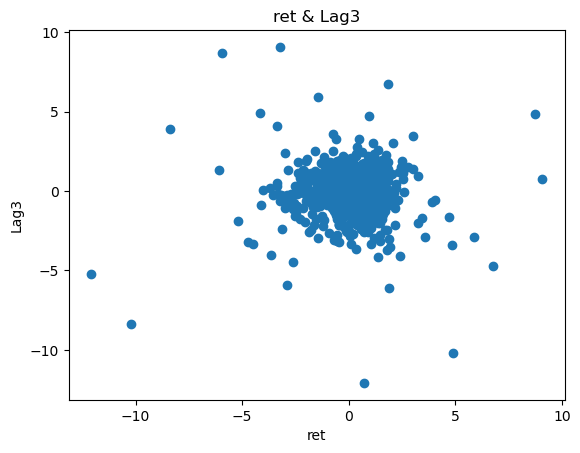

In [57]:
import matplotlib.pyplot as plt
plt.scatter(data["ret"], data["Lag3"])
plt.title('ret & Lag3')
plt.xlabel('ret')
plt.ylabel('Lag3')

Text(0, 0.5, 'Lag5')

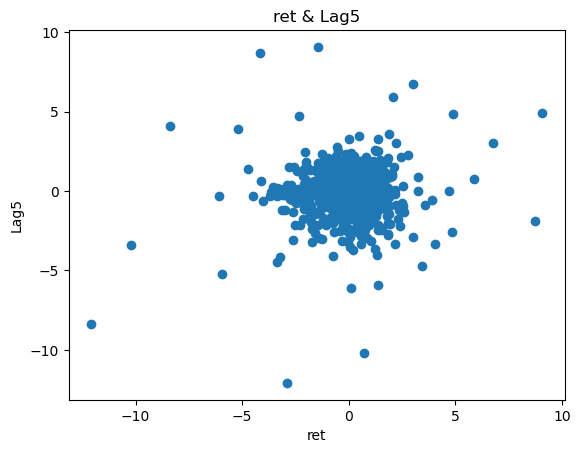

In [58]:
import matplotlib.pyplot as plt
plt.scatter(data["ret"], data["Lag5"])
plt.title('ret & Lag5')
plt.xlabel('ret')
plt.ylabel('Lag5')

## 5.a  Split your data into a training set (until 2019) and a testing set (2020-21). Using the training sample, regress next day return on the remaining variables (removing DATE).

In [59]:
pd.to_datetime(data['Date'])
training_data = data[(data['Date'] > '2015-01-01') & (data['Date'] < '2019-01-01')]
display(training_data.head())

testing_data = data.drop(training_data.index)
display(testing_data.head())

,Date,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,ret_sq
0,2015-08-17,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611,-0.257553,0.404392
1,2015-08-18,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078,-0.897452,0.066334
2,2015-08-19,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001,-2.198697,0.805420
3,2015-08-20,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131,-2.920836,4.834270
4,2015-08-21,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802,-4.103392,8.531286


,Date,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,ret_sq
850,2019-01-02,0.078330,0.23,0.74,1.13,-0.13,0.27,0.944658,-0.126470,0.896654,4.699839,-2.531593,-2.344675,0.006136
851,2019-01-03,-2.344675,-2.45,0.49,1.20,-0.23,0.89,0.078330,0.944658,-0.126470,0.896654,4.699839,3.256476,5.497499
852,2019-01-04,3.256476,3.55,0.36,-0.70,-0.10,-0.60,-2.344675,0.078330,0.944658,-0.126470,0.896654,1.003490,10.604638
853,2019-01-07,1.003490,0.94,0.87,-0.74,-0.73,-0.46,3.256476,-2.344675,0.078330,0.944658,-0.126470,1.023922,1.006993
854,2019-01-08,1.023922,1.01,0.45,-0.63,0.31,-0.07,1.003490,3.256476,-2.344675,0.078330,0.944658,0.470241,1.048417


In [60]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import time
import itertools

model = sm.OLS.from_formula('ret1 ~ SMB+HML+RMW+CMA+Lag1+Lag2+Lag3+Lag4+Lag5', training_data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ret1   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7950
Date:                Tue, 28 Feb 2023   Prob (F-statistic):              0.621
Time:                        18:23:11   Log-Likelihood:                -1094.4
No. Observations:                 850   AIC:                             2209.
Df Residuals:                     840   BIC:                             2256.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0282      0.030      0.930      0.353      -0.031       0.088
SMB            0.0291      0.060      0.484      0.629      -0.089       0.147
HML           -0.0689      0.067     -1.028      0.304      -0.201       0.063
RMW            0.0716      0.088      0.813      0.416      -0.101       0.244
CMA           -0.0295      0.106     -0.279      0.780      -0.237       0.178
Lag1          -0.0326      0.035     -0.944      0.345      -0.101       0.035
Lag2           0.0232      0.034      0.672      0.502      -0.045       0.091
Lag3          -0.0513      0.035     -1.486      0.138      -0.119       0.016
Lag4          -0.0112      0.035     -0.319      0.750      -0.080       0.058
Lag5          -0.0140      0.035     -0.395      0.693      -0.083       0.055
==============================================================================
Omnibus:                      132.332   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.529
Skew:                          -0.665   Prob(JB):                    7.74e-120
Kurtosis:                       6.704   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### b. Print a table showing what variables would be selected using best subset selection (minimizing RSS) for all predictors of the training set. Determine the optimal model using Mallows' Cp and output the model, including its coefficients.



In [61]:
data
print("Number of null values:", data["ret1"].isnull().sum())

Number of null values: 1


In [62]:
# Print the dimensions of the original data 
print("Dimensions of original data:", data.shape)

# Drop any rows the contain missing values
dataclean = data.dropna().drop('Date', axis=1)

# Print the dimensions of the modified
print("Dimensions of modified data:", dataclean.shape)

# One last check: should return 0
print("Number of null values:", dataclean["ret1"].isnull().sum())

X = dataclean.loc[:, ~dataclean.columns.isin(['ret1', 'Date'])]
y = dataclean.loc[:, 'ret1']
dataclean

Dimensions of original data: (1539, 14)
Dimensions of modified data: (1538, 13)
Number of null values: 0


,ret,RM-Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,ret_sq
0,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611,-0.257553,0.404392
1,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078,-0.897452,0.066334
2,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001,-2.198697,0.805420
3,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131,-2.920836,4.834270
4,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802,-4.103392,8.531286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1.211179,1.28,0.46,0.91,-0.98,0.22,1.003614,-0.008889,-1.748518,-0.804474,-0.090916,0.119389,1.466953
1534,0.119389,0.08,-0.39,0.70,0.62,0.23,1.211179,1.003614,-0.008889,-1.748518,-0.804474,-0.217969,0.014254
1535,-0.217969,-0.10,1.73,2.39,-0.27,0.76,0.119389,1.211179,1.003614,-0.008889,-1.748518,-2.117043,0.047511
1536,-2.117043,-2.18,0.01,1.75,0.84,1.07,-0.217969,0.119389,1.211179,1.003614,-0.008889,0.066844,4.481869


In [63]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [64]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [65]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,12):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

models_best

Processed 12 models on 1 predictors in 0.039992332458496094 seconds.
Processed 66 models on 2 predictors in 0.12680459022521973 seconds.
Processed 220 models on 3 predictors in 0.47143101692199707 seconds.
Processed 495 models on 4 predictors in 1.0356683731079102 seconds.
Processed 792 models on 5 predictors in 1.7909767627716064 seconds.
Processed 924 models on 6 predictors in 1.9355411529541016 seconds.
Processed 792 models on 7 predictors in 1.7248029708862305 seconds.
Processed 495 models on 8 predictors in 1.1265826225280762 seconds.
Processed 220 models on 9 predictors in 0.4780886173248291 seconds.
Processed 66 models on 10 predictors in 0.14059162139892578 seconds.
Processed 12 models on 11 predictors in 0.015621185302734375 seconds.
Total elapsed time: 9.017404556274414 seconds.


,RSS,model
1,2071.568908,<statsmodels.regression.linear_model.Regressio...
2,2024.231477,<statsmodels.regression.linear_model.Regressio...
3,1999.328276,<statsmodels.regression.linear_model.Regressio...
4,1986.026517,<statsmodels.regression.linear_model.Regressio...
5,1976.808849,<statsmodels.regression.linear_model.Regressio...
6,1970.515032,<statsmodels.regression.linear_model.Regressio...
7,1968.231439,<statsmodels.regression.linear_model.Regressio...
8,1966.863397,<statsmodels.regression.linear_model.Regressio...
9,1965.001184,<statsmodels.regression.linear_model.Regressio...
10,1963.476254,<statsmodels.regression.linear_model.Regressio...


In [66]:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   ret1   R-squared (uncentered):                   0.053
Model:                            OLS   Adj. R-squared (uncentered):              0.052
Method:                 Least Squares   F-statistic:                              43.05
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                    6.46e-19
Time:                        18:23:21   Log-Likelihood:                         -2393.6
No. Observations:                1538   AIC:                                      4791.
Df Residuals:                    1536   BIC:                                      4802.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### c. Print a table showing what variables would be selected using forward subset selection (minimizing RSS) for all predictors of the training set. Determine the optimal model using BIC and output the model, including its coefficients.



In [67]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [68]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  12 models on 1 predictors in 0.0305178165435791 seconds.
Processed  11 models on 2 predictors in 0.01994466781616211 seconds.
Processed  10 models on 3 predictors in 0.011021137237548828 seconds.
Processed  9 models on 4 predictors in 0.01562190055847168 seconds.
Processed  8 models on 5 predictors in 0.015620946884155273 seconds.
Processed  7 models on 6 predictors in 0.015621185302734375 seconds.
Processed  6 models on 7 predictors in 0.0 seconds.
Processed  5 models on 8 predictors in 0.0 seconds.
Processed  4 models on 9 predictors in 0.02546215057373047 seconds.
Processed  3 models on 10 predictors in 0.009972333908081055 seconds.
Processed  2 models on 11 predictors in 0.001708984375 seconds.
Processed  1 models on 12 predictors in 0.0 seconds.
Total elapsed time: 0.19719338417053223 seconds.


In [69]:
print(models_fwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   ret1   R-squared (uncentered):                   0.078
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              21.66
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                    1.51e-24
Time:                        18:23:21   Log-Likelihood:                         -2372.9
No. Observations:                1538   AIC:                                      4758.
Df Residuals:                    1532   BIC:                                      4790.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### d. Print a table showing what variables would be selected using backward subset selection (minimizing RSS) for all predictors of the training set. Determine the optimal model using R^2 and output the model, including its coefficients.



In [70]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [71]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  12 models on 11 predictors in 0.03354310989379883 seconds.
Processed  11 models on 10 predictors in 0.04152369499206543 seconds.
Processed  10 models on 9 predictors in 0.022943973541259766 seconds.
Processed  9 models on 8 predictors in 0.01566600799560547 seconds.
Processed  8 models on 7 predictors in 0.015582799911499023 seconds.
Processed  7 models on 6 predictors in 0.015616655349731445 seconds.
Processed  6 models on 5 predictors in 0.015620708465576172 seconds.
Processed  5 models on 4 predictors in 0.015620946884155273 seconds.
Processed  4 models on 3 predictors in 0.0 seconds.
Processed  3 models on 2 predictors in 0.0 seconds.
Processed  2 models on 1 predictors in 0.015620946884155273 seconds.
Total elapsed time: 0.19274520874023438 seconds.


In [72]:
print(models_bwd.loc[6, "model"].summary())
models_best.apply(lambda row: row[1].rsquared, axis=1)

                                 OLS Regression Results                                
Dep. Variable:                   ret1   R-squared (uncentered):                   0.078
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              21.65
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                    1.57e-24
Time:                        18:23:24   Log-Likelihood:                         -2372.9
No. Observations:                1538   AIC:                                      4758.
Df Residuals:                    1532   BIC:                                      4790.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

1     0.030932
2     0.053076
3     0.064725
4     0.070948
5     0.075260
6     0.078204
7     0.079272
8     0.079912
9     0.080784
10    0.081497
11    0.081952
dtype: float64

In [73]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[7, "model"].params)

------------
Best Subset:
------------
ret    -0.150561
SMB     0.168308
HML    -0.096055
RMW     0.093820
Lag1    0.123622
Lag3   -0.071298
Lag5   -0.132790
dtype: float64


In [74]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------
ret    -0.150561
Lag5   -0.132790
Lag1    0.123622
Lag3   -0.071298
SMB     0.168308
HML    -0.096055
RMW     0.093820
dtype: float64


In [75]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------
RM-Rf    -0.146283
SMB       0.155277
HML      -0.080585
Lag1      0.123450
Lag3     -0.072188
Lag5     -0.129906
ret_sq    0.005014
dtype: float64


## 6.a.  Using the training sample, fit a Ridge regression model with all the variables to forecast excess return.  Create a graph with the diferent values of lambda and the coefficients. Fit a Ridge regression model with a 10-fold cross-validation to choose the tuning parameter lambda. Print the value of the coefficients. Using the best lambda and the test sample, predict next day excess return and calculate the mean squared error.



In [76]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np

In [77]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


(100, 12)

Text(0, 0.5, 'weights')

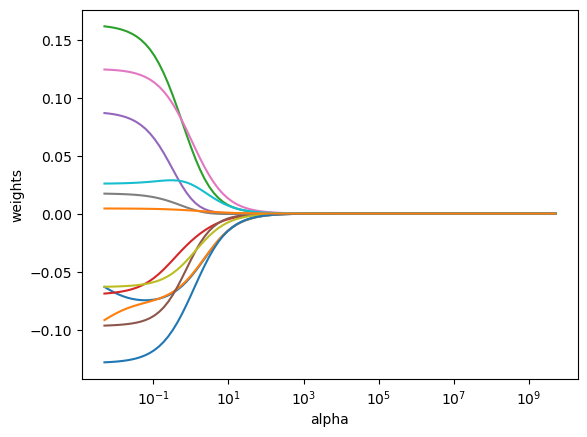

In [78]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [79]:
# Use the cross-validation package to split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [80]:
ridge2 = Ridge(alpha=4, normalize=True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))        # Calculate the test MSE

ret      -0.046217
RM-Rf    -0.044496
SMB       0.021457
HML      -0.032375
RMW      -0.011931
CMA      -0.033772
Lag1      0.043954
Lag2      0.004720
Lag3     -0.012272
Lag4      0.013022
Lag5     -0.033338
ret_sq   -0.002242
dtype: float64
1.3047398896207156


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [81]:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))        # Calculate the test MSE

ret      -2.839376e-11
RM-Rf    -2.762168e-11
SMB       7.937424e-12
HML      -1.800802e-11
RMW      -8.398270e-12
CMA      -1.678430e-11
Lag1      2.337744e-11
Lag2      1.784833e-12
Lag3     -5.787123e-12
Lag4      8.309803e-12
Lag5     -1.812510e-11
ret_sq   -1.070553e-12
dtype: float64
1.3181210643228383


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [82]:
ridge2 = Ridge(alpha=0, normalize=True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))         # Calculate the test MSE

ret      -0.515988
RM-Rf     0.262227
SMB       0.197844
HML      -0.170383
RMW       0.106615
CMA      -0.118386
Lag1      0.212552
Lag2      0.035844
Lag3     -0.065834
Lag4      0.004495
Lag5     -0.133760
ret_sq   -0.009163
dtype: float64
1.428200732951873


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [83]:
ridgecv = RidgeCV(alphas=alphas, normalize=True, scoring=None) #'mean_squared_error'
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


4.055654153948428

### b. Fit a Lasso regression model with a 10-fold cross-validation to choose the tuning parameter lambda. Print the value of the coefficients. Using the best lambda and the test sample, predict next day excess return and calculate the mean squared error.



C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


Text(0, 0.5, 'weights')

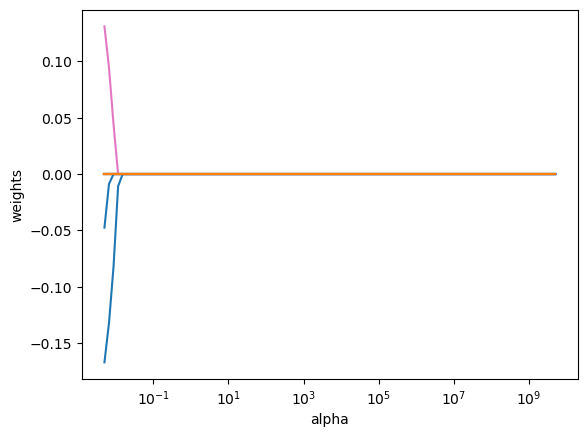

In [84]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [85]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


1.318121064342326

# Question 2 

# Create another field "Direction" in this data frame that looks to the direction of the return of the next period (ret1). After "Direction" is created, ret1 should not be included in the dataset.
  
## 1. Using the training set, run LDA to forecast "Direction."  Predict with the test sample. Calculate the confusion matrix and accuracy.

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score

direction = []
for each in data["ret1"]:
    if each > 0:
        direction.append("1")
    elif each < 0:
        direction.append("-1")
    else:
        direction.append("0")
data["Direction"] = direction
data

data.drop(['ret1'], axis=1)

pd.to_datetime(data['Date'])

X_train = data[(data['Date'] > '2015-01-01') & (data['Date'] < '2019-01-01')][['Lag1','Lag2']]
y_train = data[(data['Date'] > '2015-01-01') & (data['Date'] < '2019-01-01')]['Direction']

X_test = data[(data['Date'] < '2019-01-01')][['Lag1','Lag2']]
y_test = data[(data['Date'] < '2019-01-01')]['Direction']

lda = LDA()
model = lda.fit(X_train, y_train)

print(model.priors_)

[0.45647059 0.00470588 0.53882353]


In [87]:
print(model.means_)

[[ 0.00743835  0.02849521]
 [-0.12900362  0.29530897]
 [ 0.04460426  0.02303227]]


In [88]:
print(model.coef_)

[[-0.0249657   0.00244951]
 [-0.20435329  0.3476701 ]
 [ 0.02293473 -0.00511155]]


In [89]:
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))

(array(['-1', '1'], dtype='<U2'), array([  5, 845], dtype=int64))


In [90]:
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[[  2   0   3]
 [  0   0   0]
 [386   4 455]]
              precision    recall  f1-score   support

          -1      0.400     0.005     0.010       388
           0      0.000     0.000     0.000         4
           1      0.538     0.993     0.698       458

    accuracy                          0.538       850
   macro avg      0.313     0.333     0.236       850
weighted avg      0.473     0.538     0.381       850



C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
pred_p = model.predict_proba(X_test)

In [92]:
print(np.unique(pred_p[:,1]>0.5, return_counts=True))

(array([False]), array([850], dtype=int64))


In [93]:
print(np.stack((pred_p[10:20,1], pred[10:20])).T)

[['0.009935685119241817' '1']
 ['0.005275625990962476' '1']
 ['0.006222460818570858' '1']
 ['0.0010625708780699257' '1']
 ['0.008223276257083786' '1']
 ['0.00614847620809408' '1']
 ['0.0016013133685410389' '1']
 ['0.013830274120685137' '1']
 ['0.002453949547094639' '1']
 ['0.00480246842393119' '1']]


In [94]:
print(np.unique(pred_p[:,1]>0.9, return_counts=True))

(array([False]), array([850], dtype=int64))


In [95]:
max(pred_p[:,1])

0.01865449424764046

## 2. Write your own code to determine the estimate of the expected test error of your model to forecast "Direction" using K=5 cross validation.  Do this by actually splitting the complete dataset into five pieces and give the average of the test error, not just by using a command from a package.



In [96]:
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

lm = skl_lm.LinearRegression()
model = lm.fit(X_train, y_train)

X = data[(data['Date'] < '2019-01-01')][['Lag1','Lag2']]
y = data[(data['Date'] < '2019-01-01')]['Direction']

crossvalidation = KFold(n_splits=5, random_state=1, shuffle=True)

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 1.0040730357901293, STD: 0.017602301225102934
Degree-2 polynomial MSE: 1.0196820577193444, STD: 0.015045533816208418
Degree-3 polynomial MSE: 1.0174890947926332, STD: 0.025670372210249207
Degree-4 polynomial MSE: 1.0228269677997848, STD: 0.022706040008079357
Degree-5 polynomial MSE: 1.124893684380799, STD: 0.11090400440871952
Degree-6 polynomial MSE: 3.948224923031076, STD: 3.8485885896136973
Degree-7 polynomial MSE: 33.258231147858474, STD: 47.407297016719724
Degree-8 polynomial MSE: 753.3432900344351, STD: 897.7229500355636
Degree-9 polynomial MSE: 3511.42825366693, STD: 4017.042458334005
Degree-10 polynomial MSE: 135730.8454150358, STD: 234444.50653033925


## 3. Determine the LOOCV estimate of the expected test error of your model to forecast "Direction" using the complete dataset.  How do your answers to each part of this question compare?  Do you see any noticable differences between your answers?  Why do you think that is?



In [98]:
model = lm.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score, LeaveOneOut
loo = LeaveOneOut()

X = data[(data['Date'] < '2019-01-01')][['Lag1','Lag2']]
y = data[(data['Date'] < '2019-01-01')]['Direction']

loo.get_n_splits(X)

from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Folds: 392, MSE: 0.9929900091504105, STD: 0.12587992689308153


In [99]:
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 0.9929900091504104, STD: 0.12587992689308153
Degree-2 polynomial MSE: 1.0003579991097913, STD: 0.1424638346705295
Degree-3 polynomial MSE: 0.9960634708821777, STD: 0.178496121512458
Degree-4 polynomial MSE: 1.001521700107687, STD: 0.21020459595885904
Degree-5 polynomial MSE: 1.1146151269269085, STD: 1.3938052832606798


# Question 3 

## This question should be answered using the 𝙲𝚊𝚛𝚜𝚎𝚊𝚝𝚜  data set: this is a simulated data set containing sales of child car seats at 400 different stores. Build a model that predicts  𝚂𝚑𝚎𝚕𝚟𝚎𝙻𝚘𝚌, the shelf location (Bad, Good, or Medium) of the product at each store. 

## 1. Describe the main statistical characteristics of this dataset using the describe() function as well as graphs that support your analysis


In [108]:
newdata = pd.read_csv('Carseats.csv')
display(newdata.head())
newdata.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## 2. Split the dataset into your training sample (70%) and test sample (30%)


In [127]:
clumns = ['Sales','CompPrice','Income','Advertising','Population', 'Price','Age','Education']
X = newdata[clumns] 
y = newdata.ShelveLoc

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

print(X_train.shape[0])
print(X_test.shape[0])

280
120


## 3. Fit a logistic regression model using the training sample and another regularized model (shrinking the coefficients) to predict "Shelveloc". Compare the accuracy of both models using the test sample. Discuss your results. Hint: for the regularized model use L1-norm (Lasso): LogisticRegression(penalty='l1',...)


In [128]:
#LRM
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
 
#L1-NORM 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty = "l2").fit(X, y)

y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

0.8166666666666667
[[19  0  9]
 [ 0 21  3]
 [ 8  2 58]]
0.8166666666666667
[[19  0  9]
 [ 0 21  3]
 [ 8  2 58]]


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

## 4. Fit a linear discriminant analysis model using the training sample and another regularized model (shrinking the coefficients) to predict "Shelveloc". Compare the accuracy of both models using the test sample. Discuss your results. Hint: for the regularized model use the function LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto').



In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

#LDA

lda = LDA(n_components=1)
X = lda.fit_transform(X, y)
X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X, y)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
z = (accuracy_score(y_test, y_pred))
print(str(accuracy_score(y_test, y_pred)))

[[21  0  7]
 [ 0 22  2]
 [ 3  4 61]]
0.8666666666666667


## 5. Fit a quadratic discriminant analysis model using the training sample and another regularized model (shrinking the coefficients) to predict "Shelveloc". Compare the accuracy of both models using the test sample. Discuss your results. Hint: for the regularized model select the proper value for the option reg_param of the QuadraticDiscriminantAnalysis function.


In [131]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score

#QDA
qda = QDA()
model2 = qda.fit(X, y)
print(model2.priors_)
print(model2.means_)

pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

z2 = (accuracy_score(y_test, pred2))

[0.24   0.2125 0.5475]
[[-2.08260185]
 [ 2.71090289]
 [-0.13925556]]
(array(['Bad', 'Good', 'Medium'], dtype=object), array([27, 25, 68], dtype=int64))
[[21  0  6]
 [ 0 22  3]
 [ 7  2 59]]
              precision    recall  f1-score   support

         Bad      0.778     0.750     0.764        28
        Good      0.880     0.917     0.898        24
      Medium      0.868     0.868     0.868        68

    accuracy                          0.850       120
   macro avg      0.842     0.845     0.843       120
weighted avg      0.849     0.850     0.849       120



## 6.  Fit a KNN model with K = 1, 2, 3 using the training sample to predict "Shelveloc". Compare the accuracy of these models using the test sample. Discuss your results.


In [132]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X, y).predict(X_test)
print(classification_report(y_test, pred, digits=3))

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X, y).predict(X_test)
print(classification_report(y_test, pred, digits=3))

knn = neighbors.KNeighborsClassifier(n_neighbors=2)
pred = knn.fit(X, y).predict(X_test)
print(classification_report(y_test, pred, digits=3))

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X, y).predict(X_test)
print(classification_report(y_test, pred, digits=3))

#Accuracy
z3 = 0.767
z4 = 0.717
z5 = 0.758

              precision    recall  f1-score   support

         Bad      1.000     1.000     1.000        28
        Good      1.000     1.000     1.000        24
      Medium      1.000     1.000     1.000        68

    accuracy                          1.000       120
   macro avg      1.000     1.000     1.000       120
weighted avg      1.000     1.000     1.000       120

              precision    recall  f1-score   support

         Bad      1.000     1.000     1.000        28
        Good      1.000     1.000     1.000        24
      Medium      1.000     1.000     1.000        68

    accuracy                          1.000       120
   macro avg      1.000     1.000     1.000       120
weighted avg      1.000     1.000     1.000       120

              precision    recall  f1-score   support

         Bad      0.609     1.000     0.757        28
        Good      0.828     1.000     0.906        24
      Medium      1.000     0.662     0.796        68

    accuracy        

C:\Users\Public\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

## 7. Which of these methods in Parts 3, 4, 5, and 6 appears to provide the best results on this data? You can build a table comparing the accuracy of all the models. Explain your answer





In [136]:
print("Logistic: " + str(score))
print("LDA: " + str(z))
print("QDA: " + str(z2))
print("KNN (1): " + str(z3))
print("KNN (2): " + str(z4))
print("KNN (3): " + str(z5))

Logistic: 0.8166666666666667
LDA: 0.8666666666666667
QDA: 0.85
KNN (1): 0.767
KNN (2): 0.717
KNN (3): 0.758
